# Statistical Rethinking Ch 3 Sampling Imaginary
> Implementing and adding extra materials and contents from statistical rethinking course/book

- toc: true
- badges: true
- comments: true
- categories: [jupyter, bayesian, stats_rethinking]
- metadata_key1: bayesian
- metadata_key2: jupyter

# About
## Summary
- [Statistical rethinking](https://xcelab.net/rm/statistical-rethinking/) is an excellent book/course about Bayesian learning for beginners.
- The contents here are based on the book and his lecture. Summarizing, adding bits and pieces to facilitate the understanding.
- I would recommend:
  1. Read the chapter
  2. Watch the youtube video for the corresponding chapter
  3. Implement and run the code

## Previous blog post

https://shonaka.github.io/blog/jupyter/bayesian/stats_rethinking/2020/03/03/stats_rethinking1.html

# Chapter 3
## Overview
- Let's sample!!

In [1]:
#hide
import jax
import jax.numpy as np
import numpyro
import numpyro.distributions as dist

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]
sns.set_style("darkgrid")
sns.set_context("talk")

Getting the previous code to calculate the posterior distribution.

In [2]:
# Define the variables
num_grid_points = 1000  # number of points in the grid
total_count = 9  # total number of samples
water_count = 6  # number of water sample collected
# Define the grid (from 0 to 1, 20 points)
probability_grid = np.linspace(start=0, stop=1, num=num_grid_points)
# Define the prior (Using uniform distribution, 1 all the way)
prior = np.ones(num_grid_points)
# Calculate the likelihood
likelihood = np.exp(
    dist.Binomial(
        total_count=total_count,
        probs=probability_grid
    ).log_prob(water_count)
)
# Now we can calculate the posterior but unstandardized
unstandardized_posterior = likelihood * prior
# Divide it by the Marginal which is just the sum
posterior = unstandardized_posterior / np.sum(unstandardized_posterior)

In [3]:
samples = probability_grid[
    dist.Categorical(
        probs=posterior
    ).sample(
        jax.random.PRNGKey(0), (10000,)
    )
]

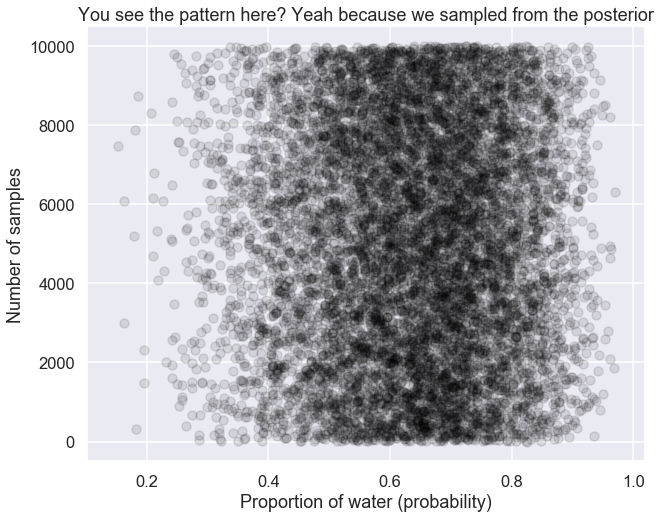

In [4]:
#collapse-hide
plt.scatter(samples, range(len(samples)), color="k", alpha=0.1)
# some other stuff
plt.xlabel("Proportion of water (probability)")
plt.ylabel("Number of samples")
plt.title("You see the pattern here? Yeah because we sampled from the posterior");

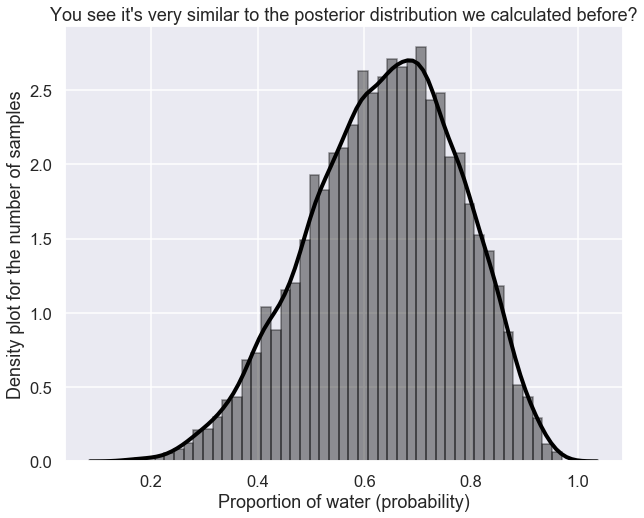

In [17]:
#collapse-hide
sns.distplot(samples,
             hist=True,
             kde=True,
             norm_hist=True,
             color = 'black',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlabel("Proportion of water (probability)")
plt.ylabel("Density plot for the number of samples")
plt.title("You see it's very similar to the posterior distribution we calculated before?");